In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.options.mode.chained_assignment = None

In [2]:
def get_text_list(file_path):
    with open(file_path, 'rb') as f:
        texts = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
    return list(texts[texts['text_graph_desc'] == True]['text_id'])

In [3]:
paths = ['/home/zlovoblachko/local_realec/Exam2014/Task 1/Exam2014_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2015/Task 1/Exam2015_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2016/Task 1/Exam2016_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2017/Task 1/Exam2017_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2019/Task 1/Exam2019_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 1/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 2/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 3/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 4/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 5/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 6/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 7/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 8/Exam2020_text_table.tsv']

relevant_texts_nums = []

for path in paths:
    relevant_texts_nums.append(get_text_list(path))

In [4]:
def get_mistakes_tables(file_path, texts_list):
    with open(file_path, 'rb') as f:
        year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
    year_corpus['year'] = '_'.join(file_path.split('/')[4:6])
    return year_corpus[year_corpus['text_id'].isin(texts_list)]

In [5]:
paths_mistakes = ['/home/zlovoblachko/local_realec/Exam2014/Task 1/Exam2014_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2015/Task 1/Exam2015_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2016/Task 1/Exam2016_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2017/Task 1/Exam2017_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2019/Task 1/Exam2019_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 1/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 2/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 3/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 4/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 5/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 6/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 7/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 8/Exam2020_mistakes_table.tsv']

relevant_mistakes_all_df = pd.DataFrame()

for file_path, text_list in zip(paths_mistakes, relevant_texts_nums):
    relevant_mistakes_all_df = pd.concat([relevant_mistakes_all_df, get_mistakes_tables(file_path, text_list)])

relevant_mistakes_all_df.head()

/tmp/ipykernel_171763/1294121175.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
/tmp/ipykernel_171763/1294121175.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
/tmp/ipykernel_171763/1294121175.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')


,mistake_id,text_id,sentence_id,ann_id,mistake_type,error_span,error_span_poses,cause,correction,first_token_id,...,mistake_corrected,correction_tokens,correction_poses,correction_lemmas,correction_token_spaces,ref_1,ref_2,span_start,span_end,year
0,1,1,7,T,Spelling,tendention,NN1,NaN,tendency,193,...,True,tendency,NN1,tendency,0,NaN,NaN,868,878,Exam2014_Task 1
1,2,1,1,T,Agreement_errors,visualize,VVB,NaN,demonstrates,3,...,False,demonstrates,VVZ,demonstrate,0,NaN,NaN,14,23,Exam2014_Task 1
2,3,1,4,T,Redundant_comp,part,NN1,NaN,NaN,108,...,False,NaN,NaN,NaN,NaN,NaN,NaN,509,513,Exam2014_Task 1
3,4,1,4,A,Delete,NaN,NaN,NaN,NaN,108,...,False,NaN,NaN,NaN,NaN,3.0,NaN,not found,not found,Exam2014_Task 1
4,5,1,5,T,Spelling,whew,VVB,NaN,when,149,...,True,when,AVQ,when,0,NaN,NaN,687,691,Exam2014_Task 1


In [6]:
mistakes_use = relevant_mistakes_all_df[['mistake_id', 'text_id', 'sentence_id', 'mistake_type', 'error_span', 'correction', 'span_start', 'span_end', 'year']]
mistakes_use.head()

,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year
0,1,1,7,Spelling,tendention,tendency,868,878,Exam2014_Task 1
1,2,1,1,Agreement_errors,visualize,demonstrates,14,23,Exam2014_Task 1
2,3,1,4,Redundant_comp,part,NaN,509,513,Exam2014_Task 1
3,4,1,4,Delete,NaN,NaN,not found,not found,Exam2014_Task 1
4,5,1,5,Spelling,whew,when,687,691,Exam2014_Task 1


In [7]:
mistakes_use.groupby('mistake_type').size()

mistake_type
Absence_comp_sent       2343
Absence_explanation     1690
Adj_as_collective         14
Adjectives                43
Adverbs                   14
                       ...  
note                     416
punct                   8595
spell                   1487
suggestion               853
vocab                  10382
Length: 80, dtype: int64

<Axes: xlabel='mistake_type'>

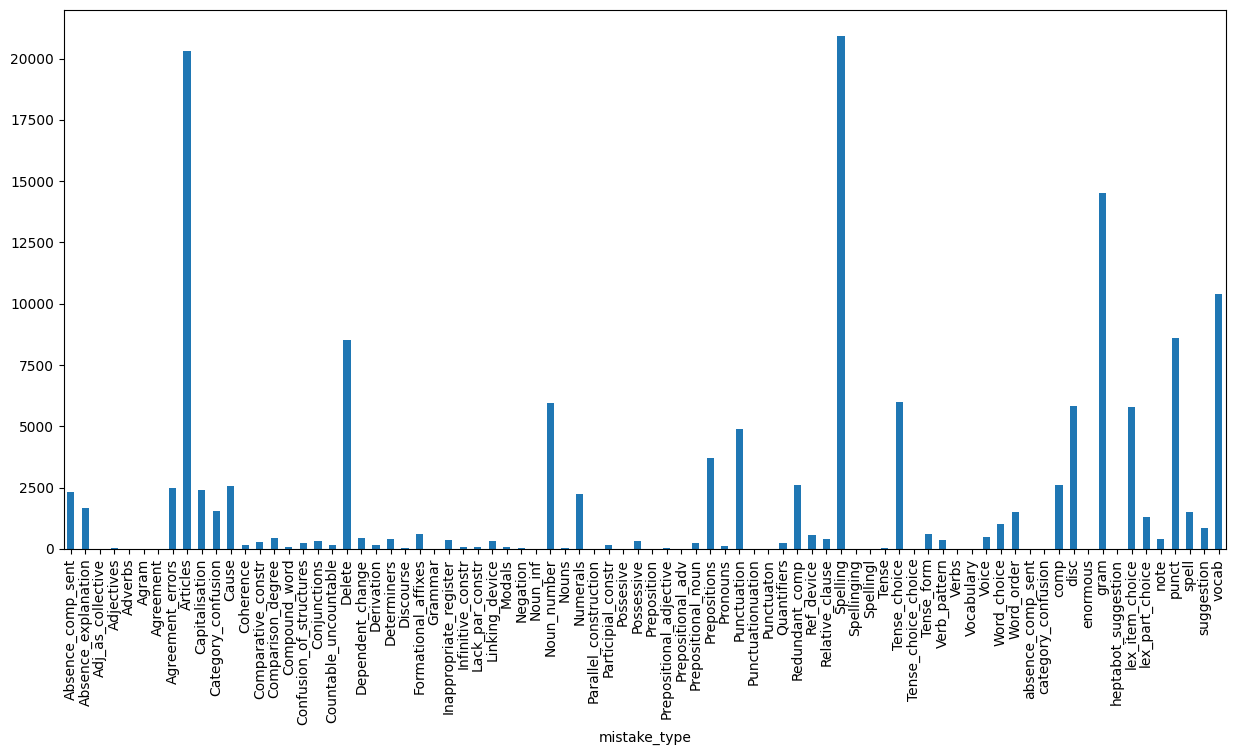

In [8]:
plt.figure(figsize=(15, 7))
mistakes_use.groupby('mistake_type').size().plot(kind='bar')

In [9]:
mistakes_use['type'] = None

In [10]:
mistakes_use_filtered = mistakes_use[(mistakes_use['span_start'] != 'not found') & (mistakes_use['span_end'] != 'not found')]
mistakes_use_filtered['span_start'] = mistakes_use_filtered['span_start'].astype(int)
mistakes_use_filtered['span_end'] = mistakes_use_filtered['span_end'].astype(int)

In [ ]:
repeat_mistakes = []

for year_code in tqdm(mistakes_use_filtered['year'].unique()):
    one_year = mistakes_use_filtered[mistakes_use_filtered['year'] == year_code]
    for i in range(len(one_year['text_id'].unique())):
        one_text = one_year[one_year['text_id'] == i]
        one_text.sort_values('span_start', inplace=True)
        for num_line in range(len(one_text)):
            try:
                if one_text.iloc[num_line]['span_start'] == one_text.iloc[num_line + 1]['span_start'] and one_text.iloc[num_line]['span_end'] == one_text.iloc[num_line + 1]['span_end']:
                    one_text.at[one_text.index[num_line], 'type'] = 'Coincide'
                    one_text.at[one_text.index[num_line + 1], 'type'] = 'Coincide'
                    repeat_mistakes.append(one_text.iloc[num_line])
                    repeat_mistakes.append(one_text.iloc[num_line + 1])
                    break
                if one_text.iloc[num_line + 1]['span_start'] < one_text.iloc[num_line]['span_end']:
                    one_text.at[one_text.index[num_line], 'type'] = 'Overlap'
                    one_text.at[one_text.index[num_line + 1], 'type'] = 'Overlap'
                    repeat_mistakes.append(one_text.iloc[num_line])
                    repeat_mistakes.append(one_text.iloc[num_line + 1])
            except IndexError:
                continue
repeat_mistakes[2:4]

100%|██████████| 13/13 [00:07<00:00,  1.82it/s]


[mistake_id                    1
 text_id                       3
 sentence_id                   1
 mistake_type           Spelling
 error_span            velaiting
 correction             relating
 span_start                   24
 span_end                     33
 year            Exam2014_Task 1
 type                    Overlap
 Name: 70, dtype: object,
 mistake_id                         4
 text_id                            3
 sentence_id                        1
 mistake_type     Absence_explanation
 error_span              velaiting to
 correction      on the percentage of
 span_start                        24
 span_end                          36
 year                 Exam2014_Task 1
 type                         Overlap
 Name: 73, dtype: object]

In [12]:
repeat_mistakes_df = pd.DataFrame(repeat_mistakes)
repeat_mistakes_df.drop_duplicates(inplace=True)
repeat_mistakes_df.reset_index(drop=True, inplace=True)
repeat_mistakes_df

,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,type
0,2,1,1,Agreement_errors,visualize,demonstrates,14,23,Exam2014_Task 1,Coincide
1,7,1,1,lex_item_choice,visualize,demonstrates,14,23,Exam2014_Task 1,Coincide
2,1,3,1,Spelling,velaiting,relating,24,33,Exam2014_Task 1,Overlap
3,4,3,1,Absence_explanation,velaiting to,on the percentage of,24,36,Exam2014_Task 1,Overlap
4,35,3,6,Articles,diagramm,the graph,520,528,Exam2014_Task 1,Coincide
...,...,...,...,...,...,...,...,...,...,...
4983,2,186,2,vocab,middle-age,middle-aged,279,289,Exam2020_Task 8,Overlap
4984,6,192,5,Articles,elders,the elderly,748,754,Exam2020_Task 8,Coincide
4985,7,192,5,gram,elders,elderly,748,754,Exam2020_Task 8,Coincide
4986,4,198,2,Articles,Number,The numbers,127,133,Exam2020_Task 8,Coincide


In [13]:
repeat_mistakes_df.groupby('mistake_type').size()

mistake_type
Absence_comp_sent           156
Absence_explanation          97
Adjectives                    2
Adverbs                       1
Agreement_errors             87
Articles                   1161
Capitalisation               69
Category_confusion          166
Coherence                     8
Comparative_constr           26
Comparison_degree            31
Compound_word                 8
Confusion_of_structures      19
Conjunctions                 11
Countable_uncountable        12
Derivation                   19
Determiners                   3
Discourse                     4
Formational_affixes          78
Grammar                       1
Inappropriate_register       17
Infinitive_constr             4
Lack_par_constr               5
Linking_device               16
Modals                        5
Negation                      1
Noun_number                 181
Nouns                         3
Numerals                     69
Participial_constr           17
Possessive                 

<Axes: xlabel='mistake_type'>

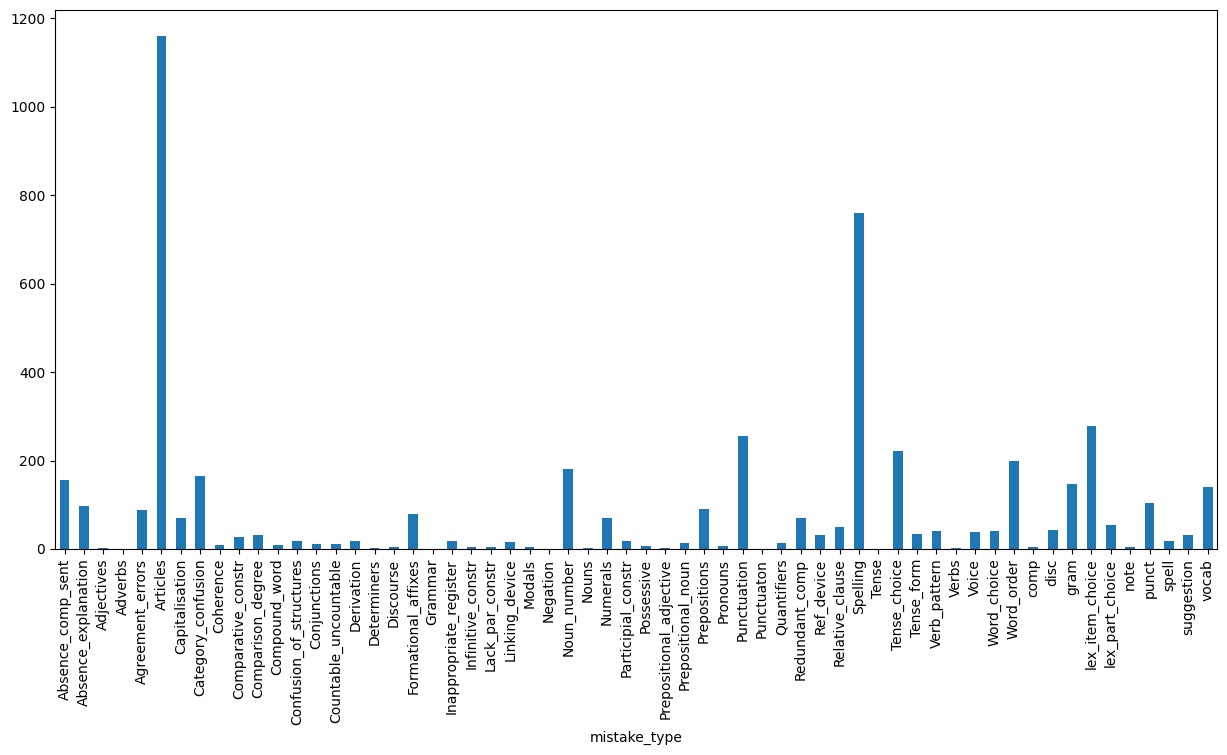

In [14]:
plt.figure(figsize=(15, 7))
repeat_mistakes_df.groupby('mistake_type').size().plot(kind='bar')

In [15]:
compar_df = pd.DataFrame(mistakes_use.groupby('mistake_type').size()).join(pd.DataFrame(repeat_mistakes_df.groupby('mistake_type').size()), 
                                                                           lsuffix='_all', rsuffix='_repeat').fillna(0)

compar_df

,0_all,0_repeat
mistake_type,,
Absence_comp_sent,2343,156.0
Absence_explanation,1690,97.0
Adj_as_collective,14,0.0
Adjectives,43,2.0
Adverbs,14,1.0
...,...,...
note,416,4.0
punct,8595,105.0
spell,1487,19.0


<Axes: title={'center': 'Exams 2014-2020 GD tasks: Overlapping Mistake Types'}, xlabel='mistake_type'>

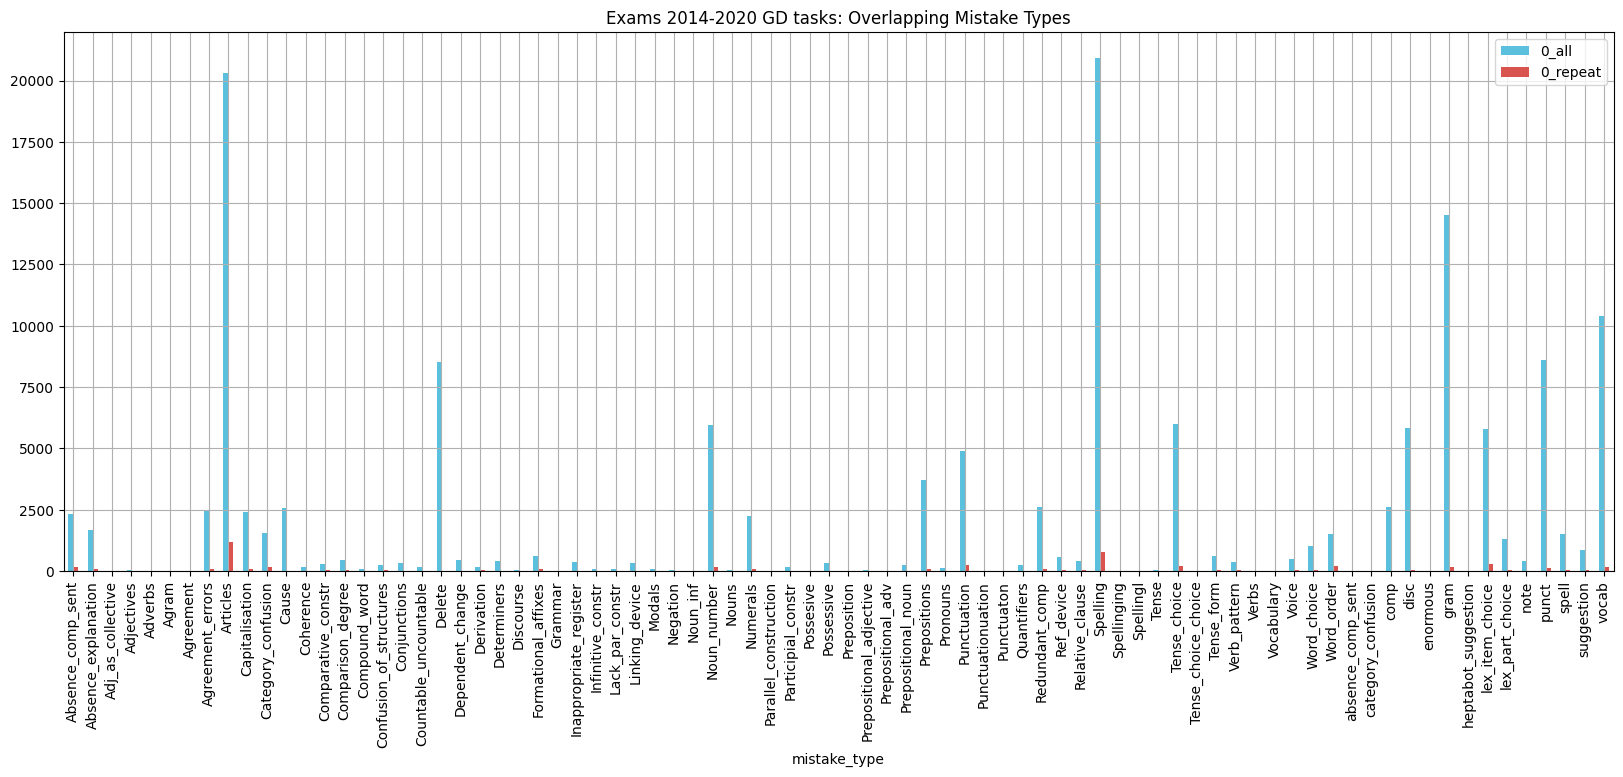

In [16]:
compar_df.plot(kind='bar', figsize=(20, 7), title="Exams 2014-2020 GD tasks: Overlapping Mistake Types", grid=True, color=['#5bc0de', '#d9534f'])

In [17]:
compar_df['diff'] = compar_df['0_all'] - compar_df['0_repeat']
compar_df['%_share'] = compar_df['0_repeat'] / compar_df['0_all'] * 100

compar_df.sort_values(by = '%_share', ascending=False).head(15)

,0_all,0_repeat,diff,%_share
mistake_type,,,,
Punctuaton,1,1.0,0.0,100.000000
Grammar,1,1.0,0.0,100.000000
Verbs,11,2.0,9.0,18.181818
Discourse,26,4.0,22.0,15.384615
Word_order,1501,200.0,1301.0,13.324450
Formational_affixes,603,78.0,525.0,12.935323
Relative_clause,393,49.0,344.0,12.468193
Derivation,153,19.0,134.0,12.418301
Compound_word,74,8.0,66.0,10.810811


In [18]:
compar_df.mean()

0_all       1881.03750
0_repeat      62.35000
diff        1818.68750
%_share        6.76502
dtype: float64

In [19]:
compar_filtered = compar_df[compar_df['0_all'] >= 30]
compar_filtered.sort_values(by = '%_share', ascending = False, inplace=True)

In [20]:
compar_filtered

,0_all,0_repeat,diff,%_share
mistake_type,,,,
Word_order,1501,200.0,1301.0,13.324450
Formational_affixes,603,78.0,525.0,12.935323
Relative_clause,393,49.0,344.0,12.468193
Derivation,153,19.0,134.0,12.418301
Compound_word,74,8.0,66.0,10.810811
Category_confusion,1553,166.0,1387.0,10.688989
Verb_pattern,385,40.0,345.0,10.389610
Comparative_constr,269,26.0,243.0,9.665428
Participial_constr,179,17.0,162.0,9.497207


<Axes: title={'center': 'Exams 2014-2020 GD tasks: Overlapping Mistake Types by Share'}, xlabel='mistake_type'>

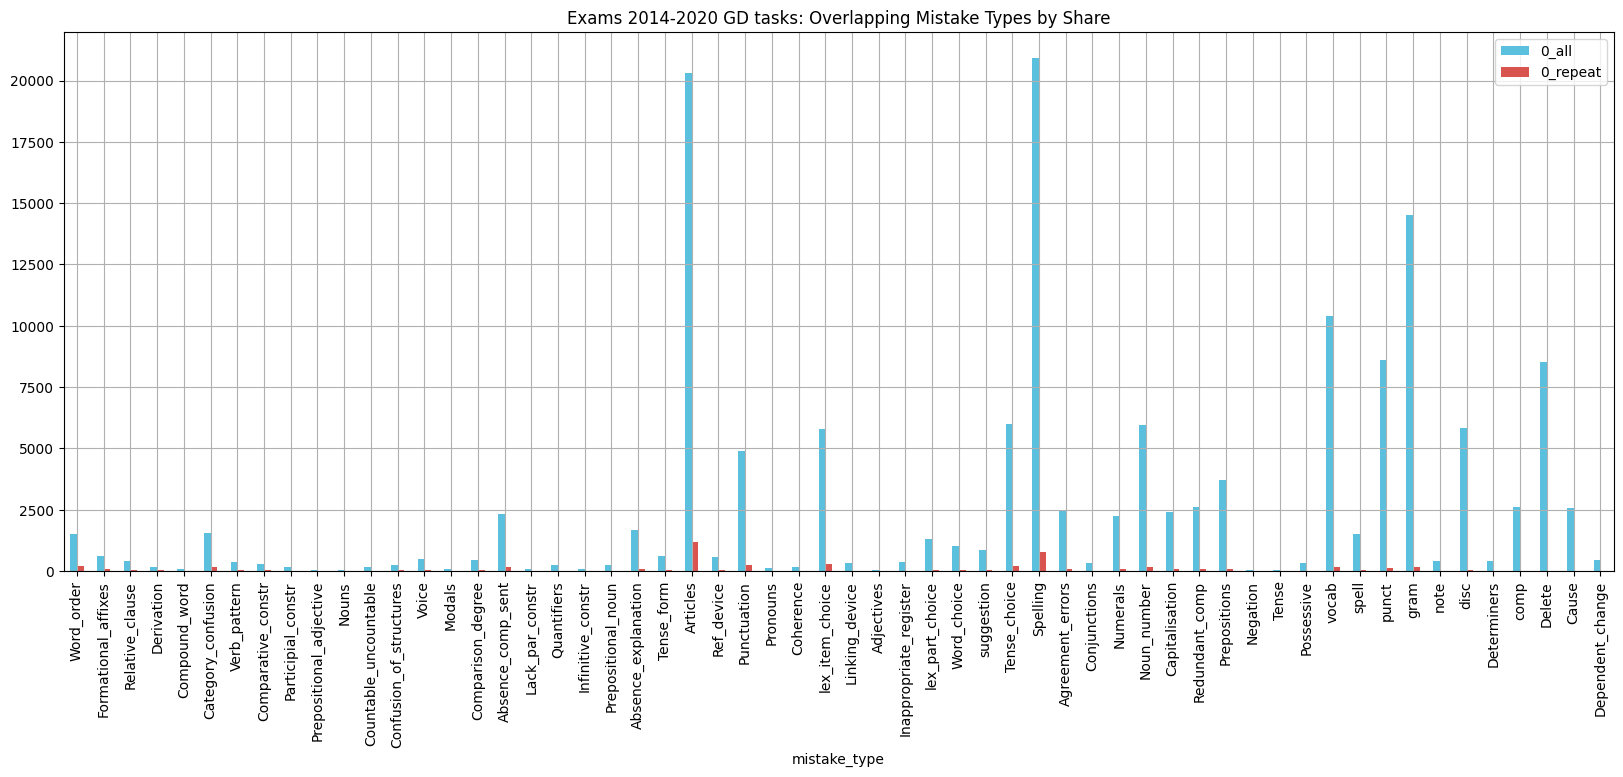

In [21]:
compar_filtered[['0_all', '0_repeat']].plot(kind='bar', figsize=(20, 7), title="Exams 2014-2020 GD tasks: Overlapping Mistake Types by Share", grid=True, color=['#5bc0de', '#d9534f'])

<Axes: title={'center': 'Exams 2014-2020 GD tasks: Overlapping Mistake Types by Share (scaled)'}, xlabel='mistake_type'>

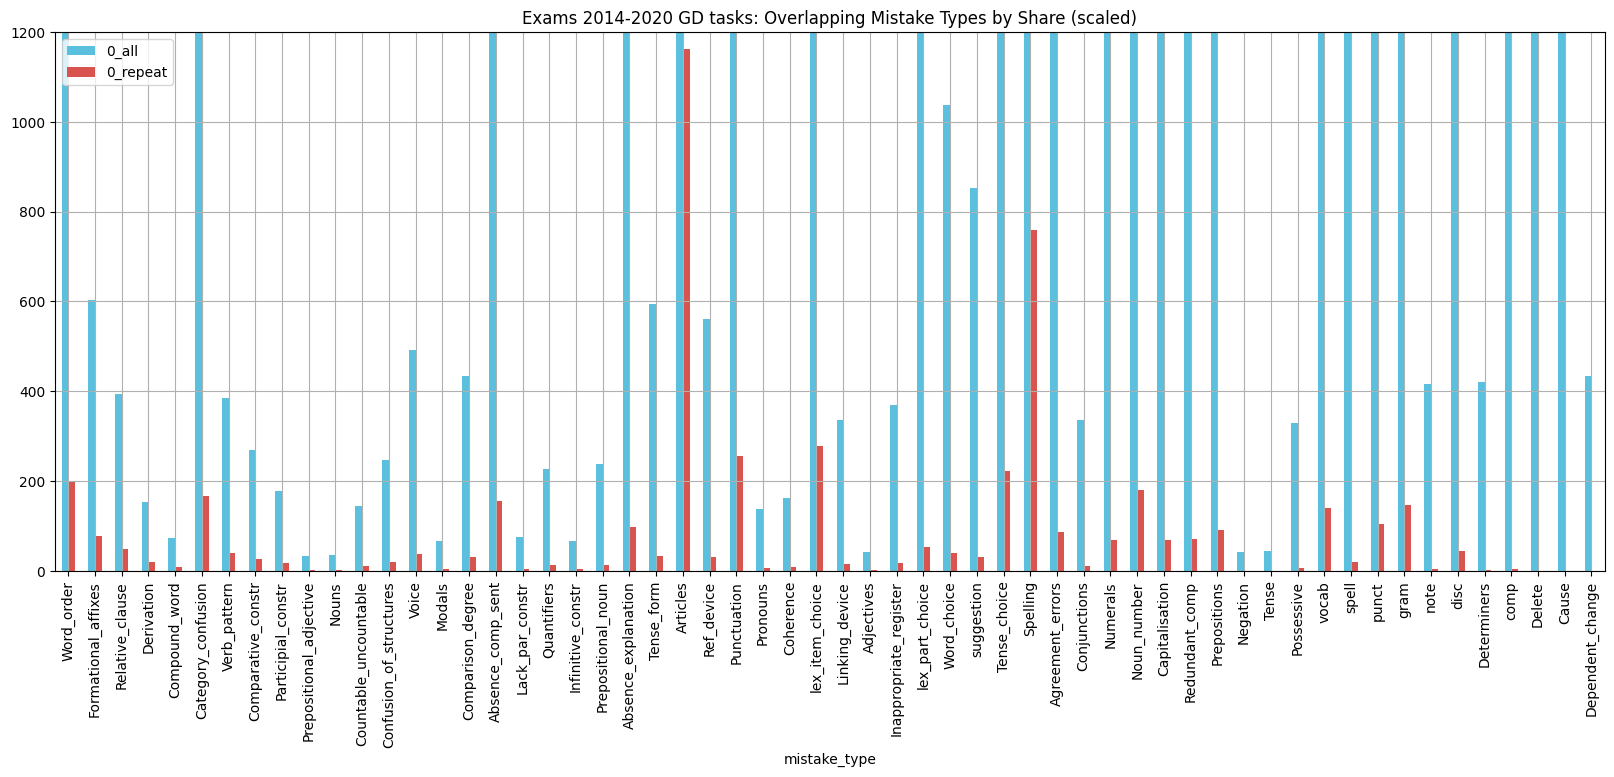

In [22]:
compar_filtered[['0_all', '0_repeat']].plot(kind='bar', figsize=(20, 7), title="Exams 2014-2020 GD tasks: Overlapping Mistake Types by Share (scaled)", grid=True, color=['#5bc0de', '#d9534f'], ylim=(0, 1200))

In [23]:
repeat_mistakes_df.groupby('type').size()

type
Coincide    2120
Overlap     2868
dtype: int64

In [37]:
repeat_mistakes_df.groupby(['type', 'mistake_type']).size().to_frame(name = 'count').reset_index()

,type,mistake_type,count
0,Coincide,Absence_comp_sent,73
1,Coincide,Absence_explanation,51
2,Coincide,Adverbs,1
3,Coincide,Agreement_errors,72
4,Coincide,Articles,317
...,...,...,...
108,Overlap,note,2
109,Overlap,punct,70
110,Overlap,spell,12
111,Overlap,suggestion,15


In [39]:
import numpy as np

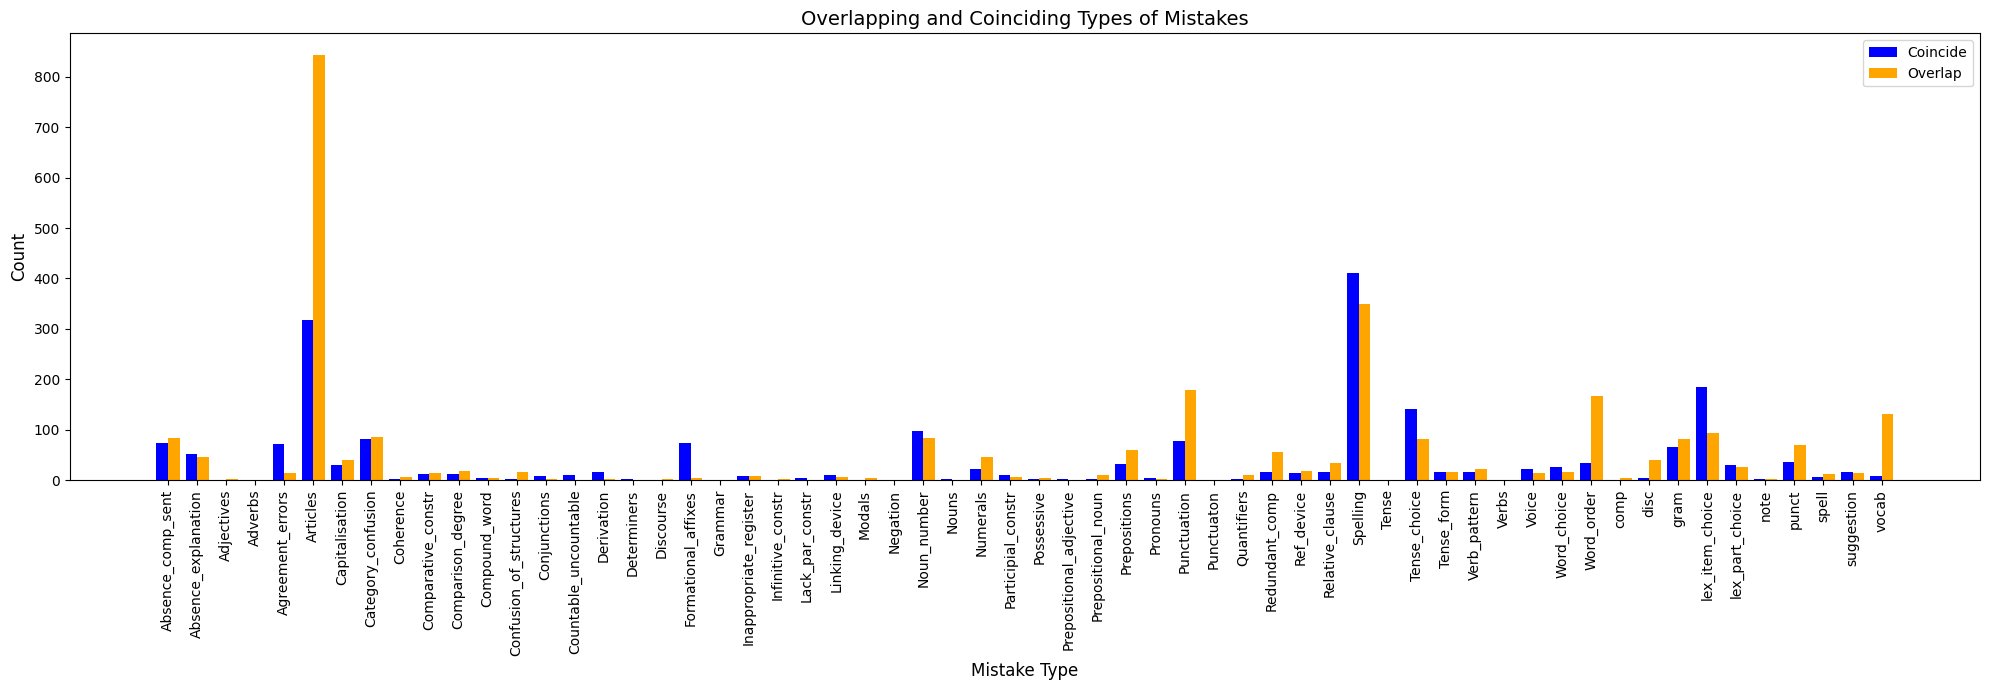

In [44]:
pivoted = repeat_mistakes_df.groupby(['type', 'mistake_type']).size().to_frame(name = 'count').reset_index().pivot(index='mistake_type', columns='type', values='count').fillna(0)
fig, ax = plt.subplots(figsize=(20, 7))
bar_width = 0.4
index = np.arange(len(pivoted))
ax.bar(index - bar_width / 2, pivoted['Coincide'], bar_width, label='Coincide', color='blue')
ax.bar(index + bar_width / 2, pivoted['Overlap'], bar_width, label='Overlap', color='orange')
ax.set_xlabel('Mistake Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Overlapping and Coinciding Types of Mistakes', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(pivoted.index, rotation=90, fontsize=10)
ax.legend()
plt.tight_layout()
plt.show()

In [46]:
repeat_mistakes_df.to_csv('/home/zlovoblachko/local_realec/Exam2014-2020_repeat_mistakes.tsv', sep='\t', encoding='utf-8', index=False)